<h1> Analisa Hotel Boking

Menganalisa Hotel boking di Negara Portugal , dimana dalam dataset ini terdapat dua jenis hotel yaitu Resort Hotel dan City Hotel. Data Tansaksi di Hotel ini terhitung dari tanggal 1 July 2015 - 31 Agustus 2017, dengan jumlah transaksi 119,390 ribu 

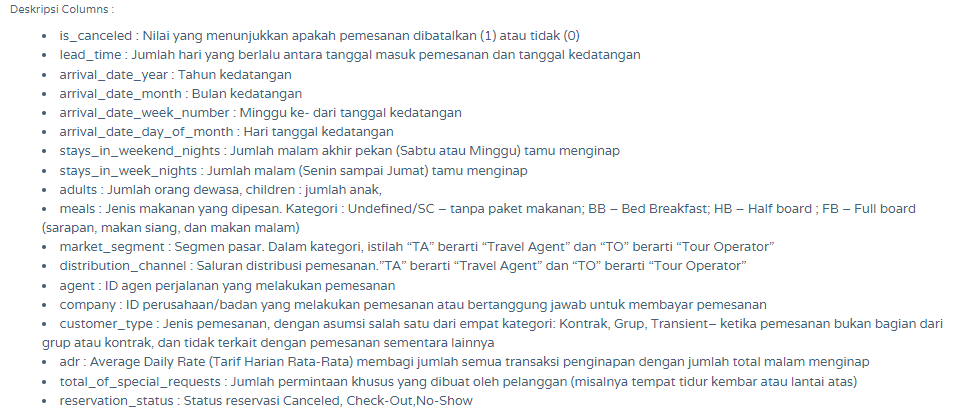

<h1> Import Libraries and Load Data Hotel

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
import matplotlib
matplotlib.__version__

'3.5.1'

In [2]:
!pip install matplotlib==3.5.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
hotel= pd.read_csv('https://raw.githubusercontent.com/RakaMurdiarta/mycoding/main/hotel_bookings.csv')
df=hotel.copy()

# Examining Data

Sebelum masuk ke proses analisa , kita harus memeriksa data sebelum dilakukan proses analisa lebih dalam. Data yang di gunakan terlebih dahulu melalui proses pemeriksaan dengan tujuan data yang di olah sudah sesuai dan tepat. Dalam proses ini kita juga dapat melihat secara umum isi data dan struktur data tersebut. 

In [4]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [5]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [8]:
df.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,10/21/2015
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


In [9]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [10]:
df.isnull().sum()/df.shape[0]

hotel                             0.000000
is_canceled                       0.000000
lead_time                         0.000000
arrival_date_year                 0.000000
arrival_date_month                0.000000
arrival_date_week_number          0.000000
arrival_date_day_of_month         0.000000
stays_in_weekend_nights           0.000000
stays_in_week_nights              0.000000
adults                            0.000000
children                          0.000034
babies                            0.000000
meal                              0.000000
country                           0.004087
market_segment                    0.000000
distribution_channel              0.000000
is_repeated_guest                 0.000000
previous_cancellations            0.000000
previous_bookings_not_canceled    0.000000
reserved_room_type                0.000000
assigned_room_type                0.000000
booking_changes                   0.000000
deposit_type                      0.000000
agent      

In [11]:
df.duplicated().sum()

31994

In [12]:
df.shape

(119390, 32)

# Data Cleaning

Pada tahap ini kita akan melakukan pembersihan data dan pengisian data sesuai dengan kebutuhan, dimana data yang akan diolah harus sesuai dan bersih tanpa ada data yang terlewat. Dalam tahap ini juga melihat seberapa besar jumlah data yang kosong yang berakibat terhadap hasil analisa nanti


In [13]:
# Fill  NaN in column country with mode
# Fill  NaN in column Children , Agent , Company with 0

# agent : Apabila tidak ada agent berarti boking dari tamu langsung
# company : Apabila tidak ada data berarti boking secara privat
df.country.fillna(df['country'].mode()[0],inplace=True)
df.children.fillna(0,inplace=True)
df.agent.fillna(0,inplace=True)
df.company.fillna(0,inplace=True)

In [14]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

# Data Preparation

In [15]:
# Memfilter data dimana kolom adults , children dan babie tidak boleh bernilai 0
filter=(df['children']==0) & (df['adults']==0) & (df['babies']==0)
df[filter].shape

(180, 32)

Terdapat 180 row dimana kolom adults , children dan babies bernilai 0

In [16]:
# Kita akan menggunakan data diluar data filter
data=df[~filter]
data.shape

(119210, 32)

Terdapat 119210 row data yang sudah bersih dan siap kita gunakan untuk analisa

In [17]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


# Exploartory Data Analysis

### Analisis 1 : Dari negara mana saja tamu yang berkunjung ke hotel?

In [18]:
df.country.unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'ETH', 

In [19]:
negara=len(df.country.unique())
print(f' Negara asal yang pernah boking di hotel ada {negara} negara ')

 Negara asal yang pernah boking di hotel ada 177 negara 


Hotel memiliki 2 type yaitu resort hotel dan city hotel, Kita akan menghitung jumlah boking dan negara mana saja yang pernah berkunjung dari masing masing type hotel

In [20]:
resort = data[(data['hotel']=='Resort Hotel') & (data['is_canceled']==0)]
city = data[(data['hotel']=='City Hotel') & (data['is_canceled']==0)]

In [21]:
resort.shape , city.shape

((28927, 32), (46084, 32))

Jumlah Boking untuk Resort Hotel adalah 28927 dan City Hotel adalah 46084

In [22]:
labels=resort['country'].value_counts().index
values=resort['country'].value_counts()
values

PRT    10603
GBR     5922
ESP     3105
IRL     1734
FRA     1399
       ...  
ZMB        1
SAU        1
SMR        1
BDI        1
MKD        1
Name: country, Length: 118, dtype: int64

In [23]:
#plt.pie(data=resort, x=values, labels=labels,startangle=-30,radius=2,autopct='%1.1f%%');

In [24]:
x=go.Pie(labels=labels,values=values,hoverinfo='label+percent',textinfo='value',title='Resort Hotel')
fig=go.Figure(data=x)
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ))
fig.show()

In [25]:
labels1=city['country'].value_counts().index
values2=city['country'].value_counts()

In [26]:
x=go.Pie(labels=labels1,values=values2,hoverinfo='label+percent',textinfo='value',title='City Hotel')
fig=go.Figure(data=x)
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ))
fig.show()

In [27]:
country_wise_data=data[data['is_canceled']==0]['country'].value_counts().reset_index()
country_wise_data

,index,country
0,PRT,21398
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
160,BHR,1
161,DJI,1
162,MLI,1
163,NPL,1


In [28]:
country_wise_data.columns=['Country','Total of Guests']
country_wise_data

,Country,Total of Guests
0,PRT,21398
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
160,BHR,1
161,DJI,1
162,MLI,1
163,NPL,1


In [29]:
import folium
from folium.plugins import HeatMap

In [30]:
basemap=folium.Map()

In [31]:
# Show on Map

map_quests=px.choropleth(data_frame=country_wise_data,
                         locations=country_wise_data['Country'],
                         color=country_wise_data['Total of Guests'],
                         hover_name=country_wise_data['Country'],
                         title='Home country of Guests')

map_quests.show()

### Analisis 2 berapa yang dibayar tamu untuk kamar per malam?

In [32]:
data2=data[data['is_canceled']==0]

In [33]:
data2

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,9/7/2017


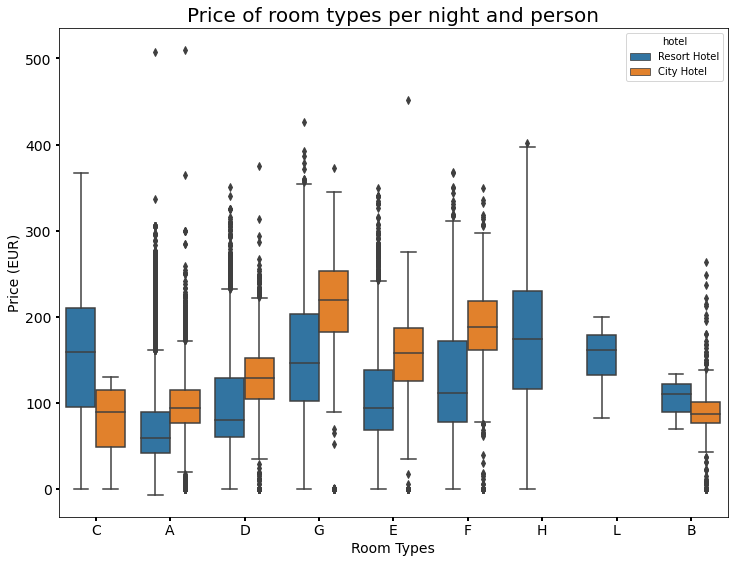

In [34]:
plt.figure(figsize=(12,9))

ax=sns.boxplot(data=data2,x='reserved_room_type', y='adr',hue='hotel')

ax.set_title('Price of room types per night and person',fontsize=20)
ax.set_xlabel('Room Types',fontsize=14)
ax.set_ylabel('Price (EUR)',fontsize=14)
ax.tick_params(axis='both',labelcolor='black', labelsize=14, width=2)

In [35]:
data2.groupby(['reserved_room_type','hotel']).adr.describe()

count        mean        std    min  \
reserved_room_type hotel                                                 
A                  City Hotel    35241.0   96.806039  31.461386   0.00   
                   Resort Hotel  17007.0   73.846920  47.994859  -6.38   
B                  City Hotel      745.0   87.514738  33.505125   0.00   
                   Resort Hotel      3.0  104.666667  32.331615  70.00   
C                  City Hotel        8.0   76.625000  52.706566   0.00   
                   Resort Hotel    615.0  154.263187  73.372132   0.00   
D                  City Hotel     7601.0  128.403021  37.999367   0.00   
                   Resort Hotel   5477.0  100.079270  57.064634   0.00   
E                  City Hotel     1038.0  154.470511  50.792479   0.00   
                   Resort Hotel   3573.0  108.993305  56.868204   0.00   
F                  City Hotel     1088.0  185.629733  52.546982   0.00   
                   Resort Hotel    926.0  128.754050  69.102716   0.00   
G                  City Hotel      363.0  195.370634  92.313200   0.00   
                   Resort Hotel    966.0  159.767650  75.206090   0.00   
H                  Resort Hotel    356.0  180.870112  77.703077   0.00   
L                  Resort Hotel      4.0  151.000000  50.345473  82.00   

                                     25%      50%       75%     max  
reserved_room_type hotel                                             
A                  City Hotel     76.670   94.500  115.0000  510.00  
                   Resort Hotel   42.375   59.000   90.0000  508.00  
B                  City Hotel     76.160   86.620  101.0800  263.55  
                   Resort Hotel   90.000  110.000  122.0000  134.00  
C                  City Hotel     48.750   89.000  115.0000  130.00  
                   Resort Hotel   94.855  158.670  210.0000  367.00  
D                  City Hotel    104.400  129.200  151.7500  375.50  
                   Resort Hotel   60.000   80.000  129.0000  350.75  
E                  City Hotel    125.000  158.250  187.0000  451.50  
                   Resort Hotel   68.400   93.670  138.0000  349.67  
F                  City Hotel    162.000  187.850  218.5725  349.63  
                   Resort Hotel   78.250  111.465  172.0750  368.10  
G                  City Hotel    182.515  220.000  253.5050  372.33  
                   Resort Hotel  101.775  146.605  203.3275  426.25  
H                  Resort Hotel  116.075  174.000  230.0000  402.00  
L                  Resort Hotel  133.000  161.000  179.0000  200.00

## Analisa 3 : Variasi harga kamar per malam sepanjang tahun

In [65]:
resort.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [66]:
city.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40060,City Hotel,0,6,2015,July,27,1,0,2,1,...,No Deposit,6.0,0.0,0,Transient,0.00,0,0,Check-Out,7/3/2015
40066,City Hotel,0,3,2015,July,27,2,0,3,1,...,No Deposit,1.0,0.0,0,Transient-Party,58.67,0,0,Check-Out,7/5/2015
40070,City Hotel,0,43,2015,July,27,3,0,2,2,...,No Deposit,1.0,0.0,0,Transient-Party,86.00,0,0,Check-Out,7/5/2015
40071,City Hotel,0,43,2015,July,27,3,0,2,2,...,No Deposit,1.0,0.0,0,Transient-Party,43.00,0,0,Check-Out,7/5/2015
40072,City Hotel,0,43,2015,July,27,3,0,2,2,...,No Deposit,1.0,0.0,0,Transient-Party,86.00,0,0,Check-Out,7/5/2015


In [75]:
resort_gb=resort.groupby('arrival_date_month')['adr'].mean().reset_index()
city_gb=city.groupby('arrival_date_month')['adr'].mean().reset_index()

In [73]:
merge_city_resort=pd.merge(resort_gb,city_gb, on='arrival_date_month',how='inner')
merge_city_resort.columns=['month','avg_price_resort','avg_price_city']
merge_city_resort

,month,avg_price_resort,avg_price_city
0,April,75.867816,111.962267
1,August,181.205892,118.674598
2,December,68.410104,88.401855
3,February,54.147478,86.520062
4,January,48.761125,82.330983
5,July,150.122528,115.818019
6,June,107.974850,117.874360
7,March,57.056838,90.658533
8,May,76.657558,120.669827
9,November,48.706289,86.946592


In [81]:
! pip install sort-dataframeby-monthorweek
! pip install sorted-months-weekdays

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [87]:
import sort_dataframeby_monthorweek as sd
merge_city_resort=sd.Sort_Dataframeby_Month(df=merge_city_resort,monthcolumnname='month')
ax=px.line(data_frame=merge_city_resort, x='month',y=['avg_price_resort','avg_price_city'])
ax.update_traces()
ax.show()

## Analisa 4 : Distribusi jumlah hari tamu menginap berdasarkan market segment dan tipe hotel

In [96]:
data2=data[['hotel','market_segment','stays_in_weekend_nights','stays_in_week_nights']]
data2.head()

,hotel,market_segment,stays_in_weekend_nights,stays_in_week_nights
0,Resort Hotel,Direct,0,0
1,Resort Hotel,Direct,0,0
2,Resort Hotel,Direct,0,1
3,Resort Hotel,Corporate,0,1
4,Resort Hotel,Online TA,0,2


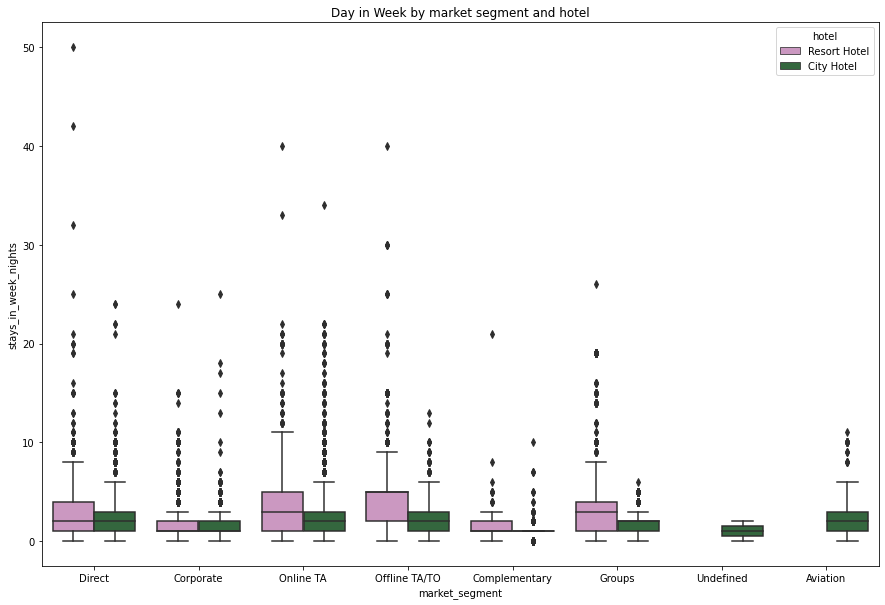

In [103]:
plt.figure(figsize=(15,10))
ax=sns.boxplot(data=data2, x='market_segment',y='stays_in_week_nights',hue='hotel',palette='cubehelix_r')
plt.title('Day in Week by market segment and hotel')
plt.show()

Dari boxplot diatas dapat kita lihat bahwa sebagian besar kelompok berdistribusi normal, beberapa diantaranua memiliki skewness yang tinggi. Dilihat dari distribusinya, kebanyakan oran sepertinya tidak suka menginap di hotel lebih dari satu minggu. Tapi sepertinya normal untuk tinggal di resort hotel hingga 12-13 hari. Tampak jelas kerika orang pergi ke resort hotel, mereka lebih suka tinggal lebih lama.

## Analisa 5 : Berapa rata - rata harga per malam berdasarkan market segment dan tipe kamar

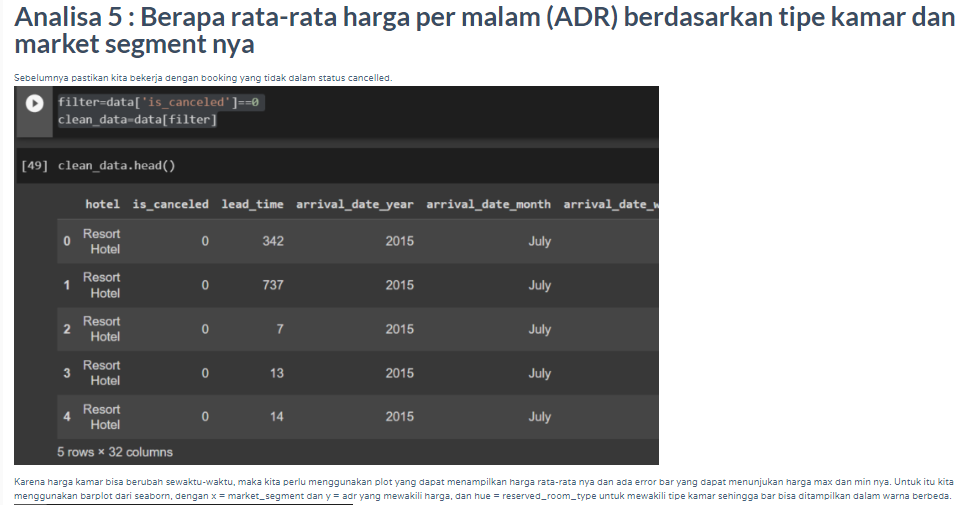

In [36]:
data2.groupby(['reserved_room_type','market_segment']).adr.describe()

count        mean        std     min  \
reserved_room_type market_segment                                           
A                  Aviation          100.0   93.608500  21.494678    0.00   
                   Complementary     395.0    3.556582  16.271737    0.00   
                   Corporate        3924.0   65.027895  29.590421    0.00   
                   Direct           5773.0   95.521883  45.211217    0.00   
                   Groups           6955.0   76.936717  33.586466   -6.38   
                   Offline TA/TO   12362.0   81.590834  32.507773    0.00   
                   Online TA       22739.0  101.427171  38.227506    0.00   
B                  Complementary      21.0    0.076190   0.349149    0.00   
                   Corporate           3.0   45.416667  39.455935    0.00   
                   Direct            196.0   91.724490  32.977426    0.00   
                   Groups              6.0   92.000000  28.802778   65.00   
                   Offline TA/TO      49.0   75.127755  29.218766    0.00   
                   Online TA         473.0   91.254482  28.902038    0.00   
C                  Complementary       6.0    9.000000  22.045408    0.00   
                   Corporate           9.0   77.000000  50.089919    0.00   
                   Direct            260.0  158.551500  68.823979    0.00   
                   Groups             16.0  104.391250  74.545431    9.67   
                   Offline TA/TO      65.0  112.250615  70.255190    0.00   
                   Online TA         267.0  166.846142  71.045886    0.00   
D                  Aviation           81.0  107.713951   9.369926   94.00   
                   Complementary      72.0    3.233194  14.309460    0.00   
                   Corporate         190.0   89.449632  32.046647    0.00   
                   Direct           1898.0  123.045785  54.706081    0.00   
                   Groups            471.0   76.214926  38.466443    0.26   
                   Offline TA/TO    2519.0   85.872398  36.418125    0.00   
                   Online TA        7847.0  129.020233  45.050778    0.00   
E                  Aviation            2.0  159.250000  48.436815  125.00   
                   Complementary      44.0    3.000000  12.473227    0.00   
                   Corporate         146.0   93.120685  41.208753    0.00   
                   Direct           1228.0  132.454357  58.815567    0.00   
                   Groups            226.0   84.552965  49.300588    0.00   
                   Offline TA/TO     814.0   99.128735  43.146256    0.00   
                   Online TA        2151.0  127.044928  59.792525    0.00   
F                  Complementary      45.0    2.222222  10.981159    0.00   
                   Corporate           5.0  105.414000  41.511167   51.00   
                   Direct            743.0  146.286878  70.107679    0.00   
                   Groups              7.0   97.714286  19.327996   72.00   
                   Offline TA/TO      50.0  127.575400  48.051173   50.54   
                   Online TA        1164.0  175.953960  55.727797    0.00   
G                  Complementary      54.0    1.175926   8.503694    0.00   
                   Corporate          12.0  108.591667  52.873098   50.00   
                   Direct            420.0  182.563548  78.823004    0.00   
                   Groups             15.0  120.533333  60.572114    0.00   
                   Offline TA/TO      19.0  184.892105  87.071967   52.00   
                   Online TA         809.0  175.390420  73.262960    0.00   
H                  Complementary       2.0    0.000000   0.000000    0.00   
                   Corporate           2.0  163.800000  33.658283  140.00   
                   Direct            126.0  175.181111  69.339488    0.00   
                   Groups              1.0  120.000000        NaN  120.00   
                   Offline TA/TO       2.0  176.900000   0.000000  176.90   
                   Online TA     

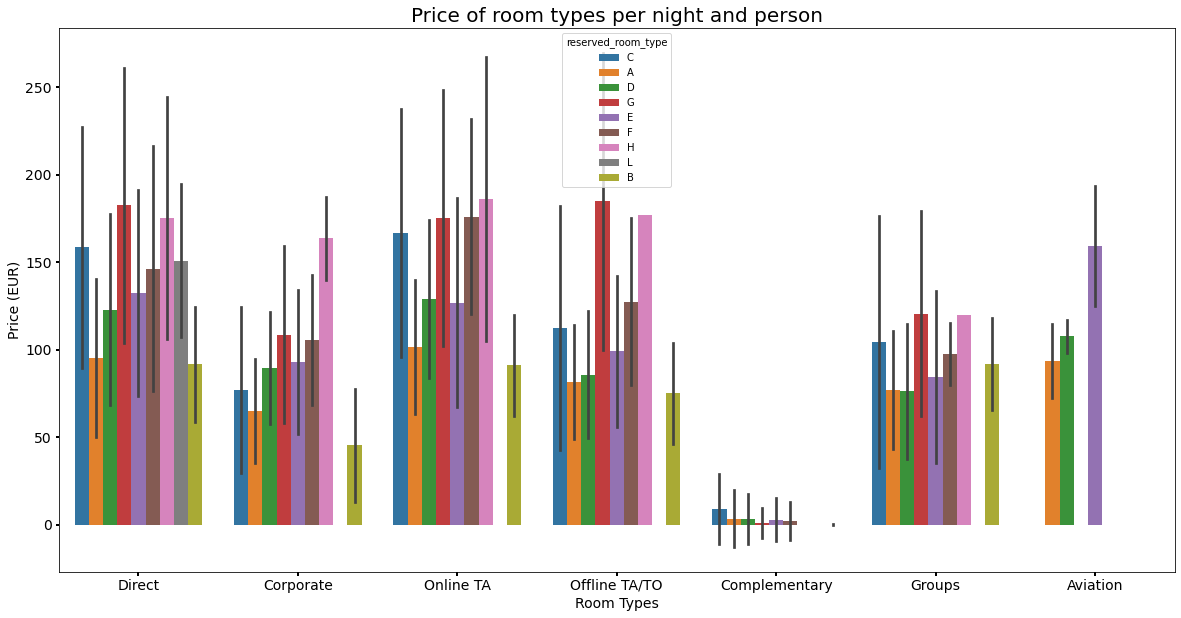

In [37]:
plt.figure(figsize=(20,10))

ax=sns.barplot(data=data2,hue='reserved_room_type', y='adr',x='market_segment',ci='sd')

ax.set_title('Price of room types per night and person',fontsize=20)
ax.set_xlabel('Room Types',fontsize=14)
ax.set_ylabel('Price (EUR)',fontsize=14)
ax.tick_params(axis='both',labelcolor='black', labelsize=14, width=2)

# Assignment

## Soal

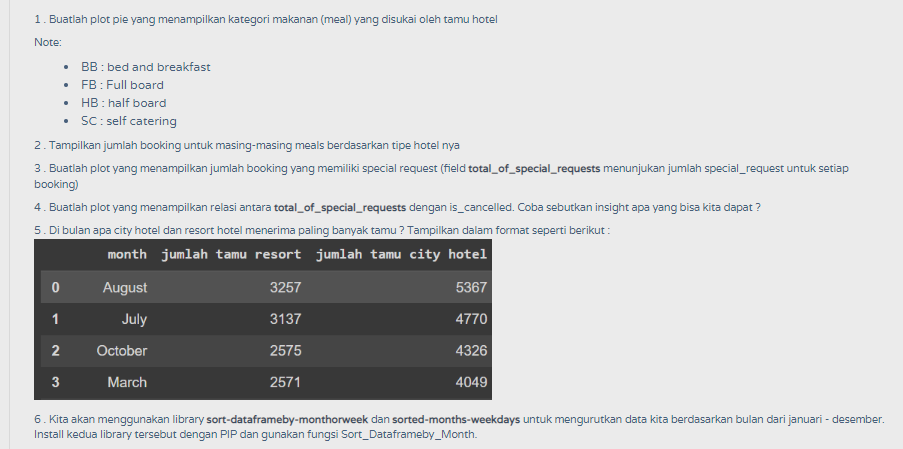

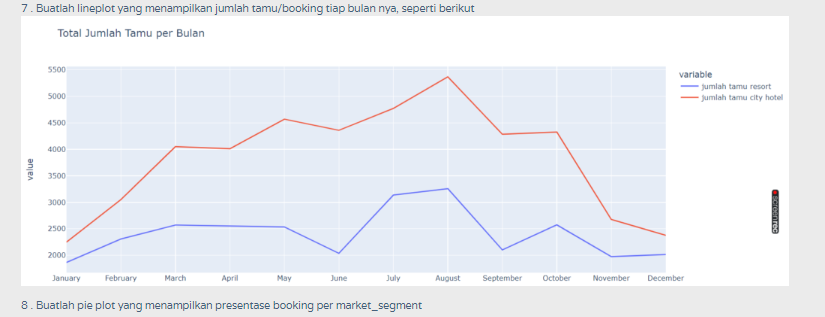

### Soal 1. Buatlah Pie yang menampilkan kategori makanan (meal) yang disukai oleh tamu hotel

Jenis Jenis Makanan yang terdapat di Hotel :


1.   BB --> Bed and Breakfast
2.   FB --> Full Board
3.   HB --> Half Board
4.   SC --> Selft Catering



In [38]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [39]:
pie=data.meal.value_counts().reset_index(name='count')
label= data.meal.value_counts().index
value= data.meal.value_counts()
pie

,index,count
0,BB,92236
1,HB,14458
2,SC,10549
3,Undefined,1169
4,FB,798


In [40]:
pie_chart=px.pie(values=value,names=label,hover_name=value,
                 title='Total Per Category Meal',
                 width=800,
                 height=600)
pie_chart.show()

Dapat kita lihat pada pie chart untuk kategory BB paling banyak diminati dengan 77 % ,diikut dengan HB (12 %) dan SC ( 8,5 % )

### Soal 2 Tampilkan Jumlah Boking untuk masing masing meals bedasarkan tipe hotel? 

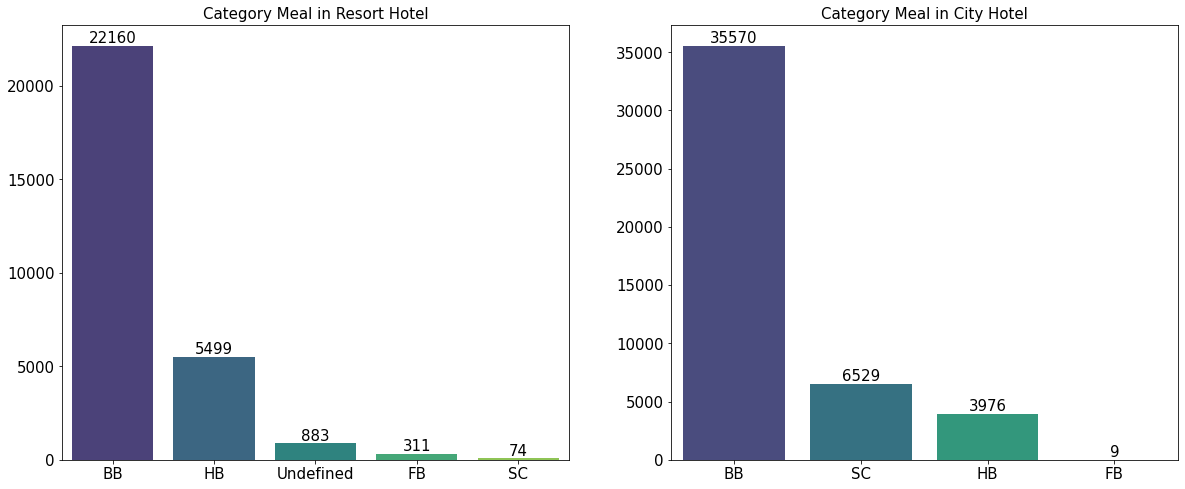

In [41]:
#resort = data[(data['hotel']=='Resort Hotel') & (data['is_canceled']==0)]
#city = data[(data['hotel']=='City Hotel') & (data['is_canceled']==0)]
plt.figure(figsize=(20,8))

list_hotel=list(data['hotel'].unique())
for i , name in enumerate(list_hotel):
  plt.subplot(1,2,i+1)
  cat_meal=data[(data['hotel']==name) & (data['is_canceled']==0)].groupby('meal').apply(lambda x:len(x)).reset_index(name='total').sort_values(by='total',ascending=False)
  ax=sns.barplot(data=cat_meal, x='meal', y='total', dodge=False,palette='viridis')
  ax.bar_label(ax.containers[i-1],fontsize=15)
  ax.set_title('Category Meal in '+name,fontsize=15)
  ax.set_xlabel(None)
  ax.set_ylabel(None)
  plt.xticks(fontsize=15)
  plt.yticks(fontsize=15)
  
  



Kesimpulan : <br>

*  Untuk Hotel bertipe Resot , jumlah tamu yang boking sebagian besar memilih kategory Meal BB dengan total 22160, diikuti dengan HB (5499)

*  Untuk Hotel bertipe City , jumlah tamu yang boking sebagian besar memilih kategory Meal BB dengan total 33570, diikuti dengan SC (6529)

Jadi sebagian besar tamu yang menginap di Hotel memeilih Kategory BB ( bed and Breakfast)


### Soal 3 Tampilkan dengan plot jumlah boking untuk yang memesan dengan Special Ruquest ?

In [42]:
data.describe()


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000
mean,0.370766,104.109227,2016.156472,27.163376,15.798717,0.927053,2.499195,1.859206,0.104043,0.007961,0.031499,0.087191,0.137094,0.218799,74.889078,10.735400,2.321215,101.969092,0.062553,0.571504
std,0.483012,106.875450,0.707485,13.601107,8.781070,0.995117,1.897106,0.575186,0.398836,0.097509,0.174663,0.844918,1.498137,0.638504,107.168884,53.830143,17.598002,50.434007,0.245360,0.792876
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,69.500000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,94.950000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,18.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


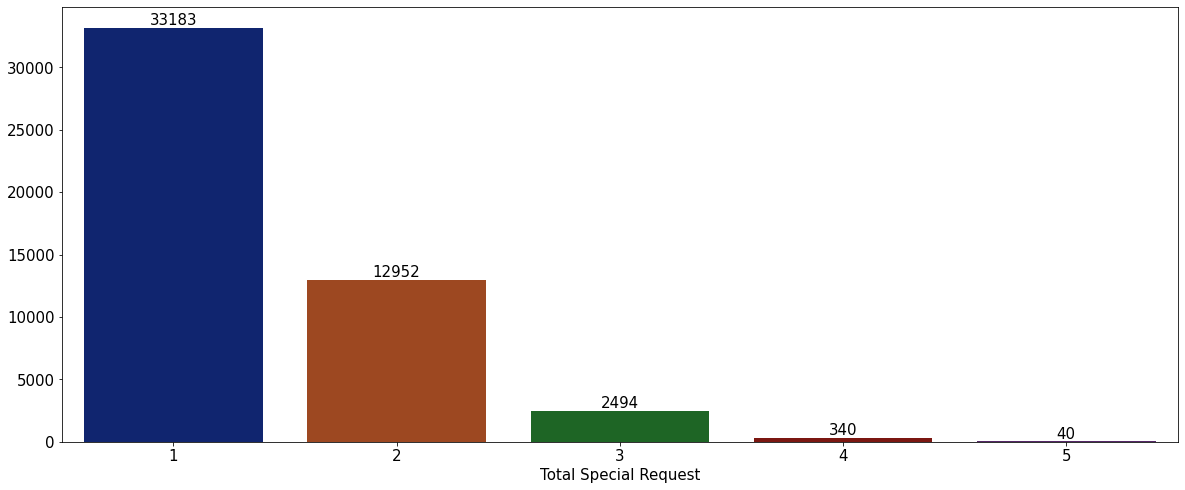

In [43]:
special_request=data.query('total_of_special_requests!=0')

plt.figure(figsize=(20,8))
ax=sns.countplot(data=special_request,x='total_of_special_requests',palette='dark')
ax.bar_label(ax.containers[0],fontsize=15)
plt.xlabel('Total Special Request',fontsize=15)
plt.ylabel(None)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()  

Jumlah boking yang memiliki special request adalah : <br>


*   Untuk Jumlah special request 1 terdapat 33183 booking 
*   Untuk Jumlah special request 2 terdapat 12952 booking 
*   Untuk Jumlah special request 3 terdapat 2494 booking 
*   Untuk Jumlah special request 4 terdapat 340 booking 
*   Untuk Jumlah special request 5 terdapat 40 booking

Kesimpulan jadi untuk total boking yang memiliki jumlah special request terbanyak yaitu berjumlah 1 sementara yang terakhir berjumlah 5


### Soal 4 Buatlah plot yang menampilkan relasi antara total of special request dengan is canceled, Coba sebutkan insight apa yang dapat kita dapat? 

In [44]:
data.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.292876,0.016622,0.008315,-0.005948,-0.001323,0.025542,0.058182,0.004851,-0.032569,-0.083745,0.110139,-0.057365,-0.144832,-0.046770,-0.083594,0.054301,0.046492,-0.195701,-0.234877
lead_time,0.292876,1.000000,0.040334,0.127046,0.002306,0.085985,0.166892,0.117575,-0.037878,-0.021003,-0.123209,0.086025,-0.073599,0.002230,-0.013114,-0.085854,0.170008,-0.065018,-0.116624,-0.095949
arrival_date_year,0.016622,0.040334,1.000000,-0.540373,-0.000121,0.021694,0.031203,0.030266,0.054710,-0.013192,0.010281,-0.119905,0.029234,0.031416,0.056438,0.033682,-0.056348,0.198429,-0.013812,0.108610
arrival_date_week_number,0.008315,0.127046,-0.540373,1.000000,0.066572,0.018629,0.016047,0.026567,0.005556,0.010417,-0.031125,0.035493,-0.021009,0.006311,-0.018225,-0.032912,0.022677,0.076281,0.001980,0.026202
arrival_date_day_of_month,-0.005948,0.002306,-0.000121,0.066572,1.000000,-0.016225,-0.028362,-0.001754,0.014550,-0.000235,-0.006471,-0.027027,-0.000306,0.011266,0.000159,0.003667,0.022532,0.030291,0.008569,0.003026
stays_in_weekend_nights,-0.001323,0.085985,0.021694,0.018629,-0.016225,1.000000,0.494175,0.094759,0.046135,0.018607,-0.086009,-0.012769,-0.042859,0.050191,0.162411,-0.080783,-0.054399,0.050670,-0.018520,0.073124
stays_in_week_nights,0.025542,0.166892,0.031203,0.016047,-0.028362,0.494175,1.000000,0.096214,0.044652,0.020373,-0.095302,-0.013976,-0.048873,0.080018,0.196777,-0.044437,-0.002026,0.066847,-0.024933,0.068738
adults,0.058182,0.117575,0.030266,0.026567,-0.001754,0.094759,0.096214,1.000000,0.029409,0.017890,-0.140973,-0.007070,-0.108856,-0.041472,0.023370,-0.166182,-0.008365,0.224253,0.014438,0.123353
children,0.004851,-0.037878,0.054710,0.005556,0.014550,0.046135,0.044652,0.029409,1.000000,0.023999,-0.032475,-0.024755,-0.021078,0.051000,0.050461,-0.042554,-0.033293,0.325057,0.056247,0.081747
babies,-0.032569,-0.021003,-0.013192,0.010417,-0.000235,0.018607,0.020373,0.017890,0.023999,1.000000,-0.008813,-0.007509,-0.006552,0.085605,0.030235,-0.009426,-0.010627,0.029043,0.037389,0.097939


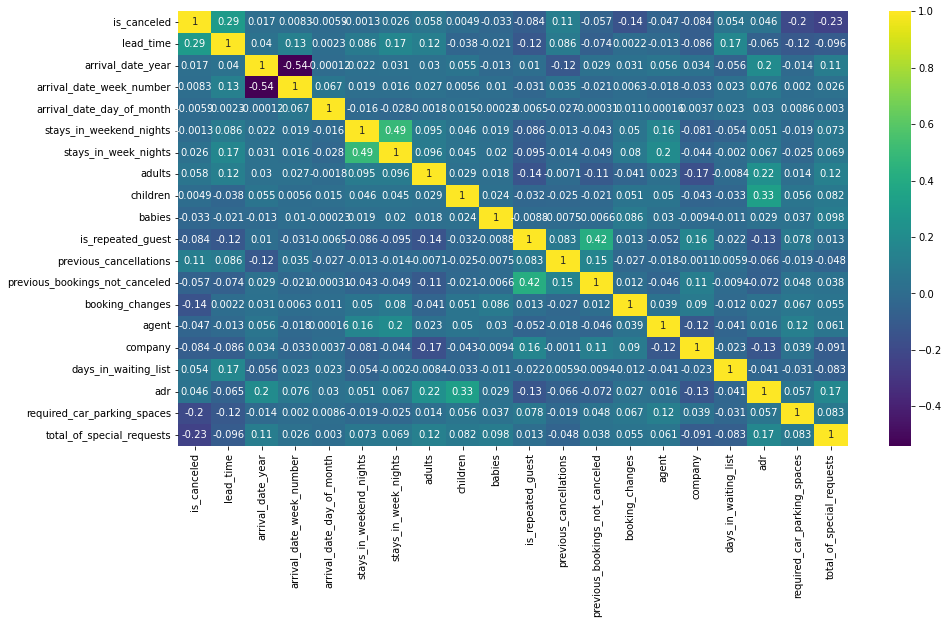

In [45]:
plt.figure(figsize=(15,8))
korelasi = sns.heatmap(data.corr(), cmap='viridis',annot=True)

<AxesSubplot:>

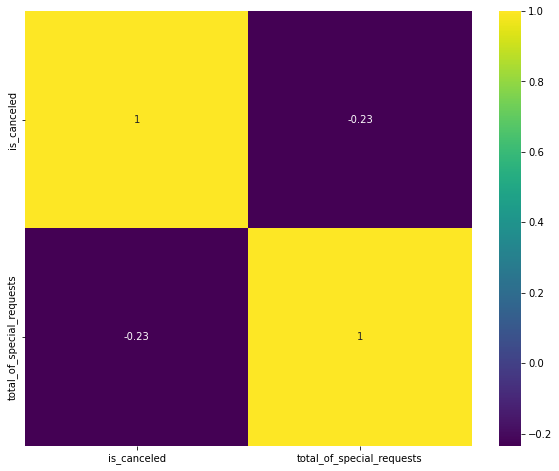

In [46]:
kor=data[['is_canceled','total_of_special_requests']]
plt.figure(figsize=(10,8))
sns.heatmap(kor.corr(), cmap='viridis',annot=True)

Berdasarkan plot diatas menunjukan bahwa kolom total special request dengan kolom is_canceled tidak memiliki hubungan satu sama lain.<br>
Artinya apakah semakin banyak tamu yang meminta Special Request , boking tidak boleh cancel, atau sebalikya jika total special request sedikit apakah tamu boleh membatalkan bokingnya.<br>

jadi kolom total special request dan kolom is_canceled memiliki fungsi nya masing masing dan tidak berkaitan satu sama lain

### Soal No 5 di Bulan apakah Resort Hotel dan City Hotel Menerima paling banyak tamu?

In [47]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [48]:
data.arrival_date_year.unique()

array([2015, 2016, 2017])

In [49]:
tamu_resort=data[(data['hotel']=='Resort Hotel') & (data['is_canceled']==0)].groupby('arrival_date_month').apply(lambda x:len(x)).reset_index(name='Jumlah Tamu Resort Hotel').sort_values(by='Jumlah Tamu Resort Hotel',ascending=False)
tamu_city=data[(data['hotel']=='City Hotel') & (data['is_canceled']==0)].groupby('arrival_date_month').apply(lambda x:len(x)).reset_index(name='Jumlah Tamu City Hotel').sort_values(by='Jumlah Tamu City Hotel',ascending=False)
tot_per_hotel=pd.merge(tamu_resort,tamu_city,on='arrival_date_month',how='inner')

In [50]:
tot_per_hotel.rename(columns={'arrival_date_month':'month'},inplace= True)

In [51]:
tot_per_hotel.columns=tot_per_hotel.columns.str.replace(' ','_')

In [52]:
tot_per_hotel.head(5)

,month,Jumlah_Tamu_Resort_Hotel,Jumlah_Tamu_City_Hotel
0,August,3257,5367
1,July,3137,4770
2,October,2575,4326
3,March,2571,4049
4,April,2550,4010


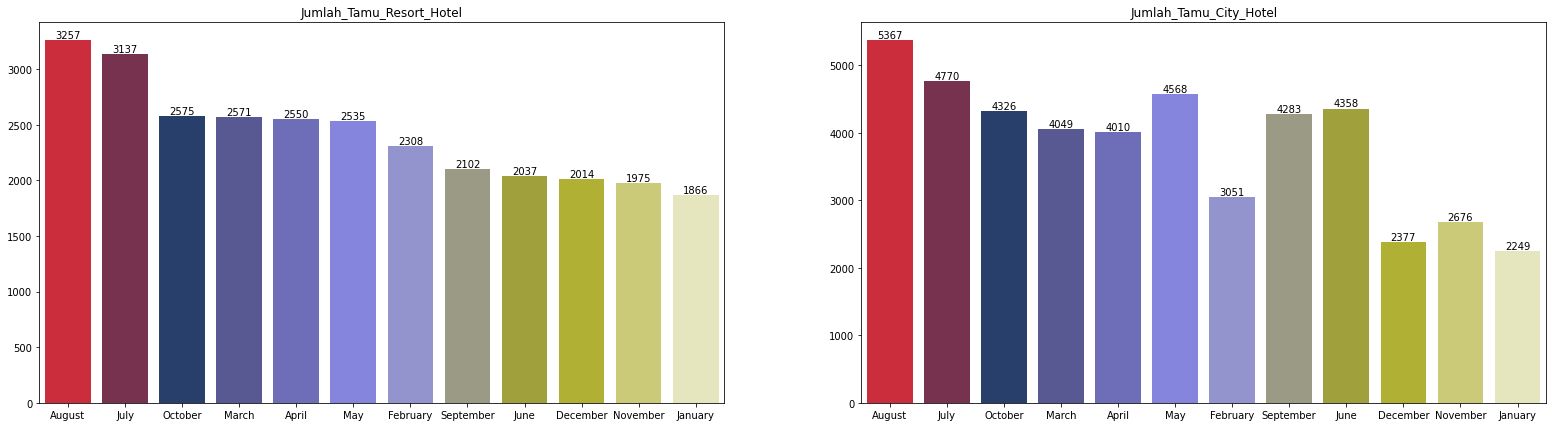

In [123]:
fig,axe=plt.subplots(1,2,figsize=(27,7))
for hotel , ax in zip(list(tot_per_hotel.columns)[-2:],axe.flatten()):
  ax=sns.barplot(data=tot_per_hotel, x='month', y=hotel, ax=ax, palette='gist_stern')
  ax.set_ylabel(None)
  ax.set_xlabel('')
  ax.bar_label(ax.containers[0])
  ax.set_title(hotel)
plt.show()

Di Bulan Agustus menjadi total kedatangan Tamu terbanyak dari masing masing kategori hotel yang ada , kemudian diikuti dengan bulan July dan Oktober<br>

Sementara untuk kedatangan tamu paling sedikit di bulan Janurai dengan total tamu 2249

### Soal No 6 dan 7 Gunakanlah Library sort dataframby monthweek dan sorted month weekdays untuk mengurutkan data kita berdasarkan bulan dari januari - desember. Kemudian Plot dengan jenis line

In [54]:
!pip install sort-dataframeby-monthorweek
!pip install sorted-months-weekdays

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sort-dataframeby-monthorweek: filename=sort_dataframeby_monthorweek-0.4-py3-none-any.whl size=3442 sha256=198208b700be3e9118bbb9708760694894acbbcd36558515ea264dd7033252a2
  Stored in directory: /root/.cache/pip/wheels/de/e1/ad/5fe265a9780676079c4b8caaaffaa8d5c4ab2f37cf823e8aa8
Successfully built sort-dataframeby-monthorweek
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3247 sha256=9994acabed01691108a6b00dc5685bbbe58b6f85d231d3acfaedabc035919401
  Stored in directory: /root/.cache/pip/wheels/4f/4f/78/3f1b8fc72651f7c766a6f73d667fccb12a8aabe240b38df7a4
Successfully built sorted-months-weekdays


In [55]:
import sort_dataframeby_monthorweek as sd

In [56]:
final= sd.Sort_Dataframeby_Month(df=tot_per_hotel,monthcolumnname='month')
final

,month,Jumlah_Tamu_Resort_Hotel,Jumlah_Tamu_City_Hotel
0,January,1866,2249
1,February,2308,3051
2,March,2571,4049
3,April,2550,4010
4,May,2535,4568
5,June,2037,4358
6,July,3137,4770
7,August,3257,5367
8,September,2102,4283
9,October,2575,4326


In [57]:
final.columns=['Month','Tamu Resort Hotel','Tamu City Hotel']
final

,Month,Tamu Resort Hotel,Tamu City Hotel
0,January,1866,2249
1,February,2308,3051
2,March,2571,4049
3,April,2550,4010
4,May,2535,4568
5,June,2037,4358
6,July,3137,4770
7,August,3257,5367
8,September,2102,4283
9,October,2575,4326


In [58]:
# Ploting dengan line plot untuk melihat pergerakan setiap bulannya

line=px.line(data_frame=final,x='Month', y=['Tamu Resort Hotel','Tamu City Hotel']
             ,title='Total Booking in Month')

line.show()

### Soal 8 Buatlah plot pie yang menampilkan presentase boking per market_segment

In [59]:
segment=data.query('is_canceled!=0')

In [60]:
data_segment=segment.copy()
data_segment['market_segment'].replace('Undefined','Others',inplace=True)

In [61]:
data_segment.shape , segment.shape

((44199, 32), (44199, 32))

In [62]:
# Ploting dengan Pie

label=list(data_segment['market_segment'].value_counts().index)
value=list(data_segment['market_segment'].value_counts().values)

px.pie(data_frame=data_segment,values=value,names=label,hole=0.4,title='Percentage of Market Segment',labels={'label':'Market Segment','value':'Percentage'})